<h2 style="color:blue" align="left"> Task 2: Prediction using Decision Tree Algorithm </h2>


## Objective

- Create the Decision Tree classifier and visualize it graphically.


- The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Author
Anuganti Suresh 

------------------

### INTRODUCTION : "IRIS" dataset

![6. Prediction using Decision Tree](image/iris_03.JPG)

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [1]:
# Read data
import numpy as np                           # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                          # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt              # Visualization using matplotlib
%matplotlib inline
import seaborn as sns                        # Visualization using seaborn

# style
plt.style.use("fivethirtyeight")             # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")                    # Set Graphs Background style using seaborn

import warnings                              # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

<h2 style="color:blue" align="left"> 2. Read Data </h2>

In [3]:
# Loading the "iris" dataset
df = pd.read_csv("Iris.csv")

In [4]:
# import first & last 5 rows
display(df.head())
display(df.tail())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# checking dimension (num of rows and columns) of dataset
print("iris data shape (Rows, Columns):", df.shape)

iris data shape (Rows, Columns): (150, 6)


In [6]:
# check dataframe structure like columns and its counts, datatypes & Null Values
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


None

In [7]:
df.drop("Id", axis=1, inplace=True)

<h2 style="color:blue" align="left"> 3. Model building and Evaluation </h2>

### Label Encoding

In [8]:
# label Encoding "Target Feature: Species"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [9]:
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [10]:
df['Species'].unique()

array([0, 1, 2])

In [11]:
df['Species'].count()

150

In [12]:
# independent variable
x = df.drop(['Species'], axis=1)

# dependent variable
y = df['Species']

In [13]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [14]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### Decision Tree Classifier

In [15]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
DCT = DecisionTreeClassifier()
DCT.fit(x, y)

DecisionTreeClassifier()

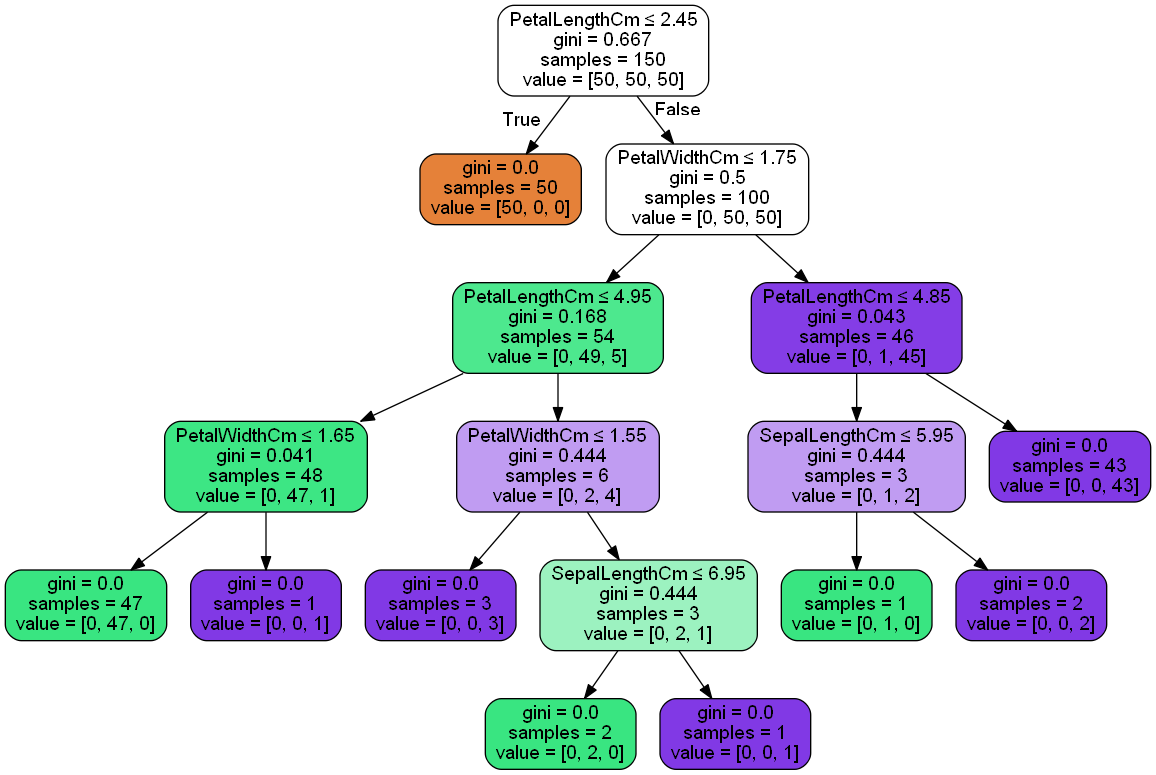

In [16]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DCT, out_file=dot_data, feature_names=x.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())